#**Predicting Sales Performance based on Employee Characteristics:**

In [ ]:
#Importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#1. Collecting Data:

In [ ]:
import pandas as pd
df=pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")
df.head()

Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                    Hire_Date  Years_At_Company Education_Level  \
0  2022-01-19 08:03:05.556036                 2     High School   
1  2024-04-18 08:03:05.556036                 0     High School   
2  2015-10-26 08:03:05.556036                 8     High School   
3  2016-10-22 08:03:05.556036                 7        Bachelor   
4  2021-07-23 08:03:05.556036                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5          6750.0                   33                32   
1                  5          7500.0                   34                34   
2                  3          5850.0                   37                27   
3                  2          4800.0                   52                10   
4                  2          4800.0                   38                11   

   Overtime_Hours  Sick_Days  Remote_Work_Frequency  Team_Size  \
0              22          2                      0         14   
1              13         14                    100         12   
2               6          3                     50         10   
3              28         12                    100         10   
4              29         13                    100         15   

   Training_Hours  Promotions  Employee_Satisfaction_Score  Resigned  
0              66           0                         2.63     False  
1              61           2                         1.72     False  
2               1           0                         3.17     False  
3               0           1                         1.86     False  
4               9           1                         1.25     False

#2. Exploratory Data Analysis(EDA):

Overview:

In [ ]:
df.describe()

Employee_ID            Age  Years_At_Company  Performance_Score  \
count  100000.000000  100000.000000     100000.000000      100000.000000   
mean    50000.500000      41.029410          4.476070           2.995430   
std     28867.657797      11.244121          2.869336           1.414726   
min         1.000000      22.000000          0.000000           1.000000   
25%     25000.750000      31.000000          2.000000           2.000000   
50%     50000.500000      41.000000          4.000000           3.000000   
75%     75000.250000      51.000000          7.000000           4.000000   
max    100000.000000      60.000000         10.000000           5.000000   

       Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  Overtime_Hours  \
count   100000.000000        100000.000000     100000.000000   100000.000000   
mean      6403.211000            44.956950         24.431170       14.514930   
std       1372.508717             8.942003         14.469584        8.664026   
min       3850.000000            30.000000          0.000000        0.000000   
25%       5250.000000            37.000000         12.000000        7.000000   
50%       6500.000000            45.000000         24.000000       15.000000   
75%       7500.000000            53.000000         37.000000       22.000000   
max       9000.000000            60.000000         49.000000       29.000000   

           Sick_Days  Remote_Work_Frequency      Team_Size  Training_Hours  \
count  100000.000000          100000.000000  100000.000000   100000.000000   
mean        7.008550              50.090500      10.013560       49.506060   
std         4.331591              35.351157       5.495405       28.890383   
min         0.000000               0.000000       1.000000        0.000000   
25%         3.000000              25.000000       5.000000       25.000000   
50%         7.000000              50.000000      10.000000       49.000000   
75%        11.000000              75.000000      15.000000       75.000000   
max        14.000000             100.000000      19.000000       99.000000   

          Promotions  Employee_Satisfaction_Score  
count  100000.000000                100000.000000  
mean        0.999720                     2.999088  
std         0.815872                     1.150719  
min         0.000000                     1.000000  
25%         0.000000                     2.010000  
50%         1.000000                     3.000000  
75%         2.000000                     3.990000  
max         2.000000                     5.000000

In [ ]:
df.info()         #(dtypes: bool(1), float64(2), int64(12), object(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

Checking Missing Values

In [ ]:
df.isna().sum()           #(no missing values.)

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [ ]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

Validating Data:

In [ ]:
df['Employee_ID'].unique()
df["Department"].unique()
df['Gender'].unique()
df['Years_At_Company'].unique()
df[(df['Age'])<(df['Years_At_Company'])]
df['Hire_Date'].describe() #most people hired on 29/09/2020-about a 46 in total
df['Hire_Date']=pd.to_datetime(df['Hire_Date'])
df['Hire_Date'].describe() #min:7/9/2014, max:3/9/2024
df['Job_Title'].describe() #specialist found mostbut we need to study sales
df['Job_Title'].unique()
df['Job_Title'].value_counts()
df['Employee_Satisfaction_Score'].unique()

array([2.63, 1.72, 3.17, 1.86, 1.25, 2.77, 4.46, 2.09, 1.44, 2.93, 2.34,
       1.96, 2.13, 1.46, 2.22, 2.42, 3.15, 1.19, 1.12, 3.91, 3.7 , 4.66,
       3.68, 4.26, 4.43, 2.12, 3.16, 1.35, 4.52, 4.95, 4.65, 1.95, 2.1 ,
       1.94, 4.21, 4.97, 2.47, 2.66, 4.22, 2.9 , 4.84, 3.59, 3.32, 2.53,
       1.59, 1.27, 1.47, 3.02, 1.43, 2.56, 1.1 , 1.87, 1.7 , 2.64, 3.97,
       4.23, 2.32, 2.15, 2.26, 1.68, 4.33, 2.45, 4.45, 4.49, 3.55, 1.31,
       4.98, 1.39, 1.75, 3.2 , 3.5 , 3.75, 3.4 , 1.33, 2.17, 4.27, 2.37,
       1.77, 1.11, 2.08, 3.22, 3.23, 3.69, 3.66, 4.1 , 4.36, 1.03, 4.2 ,
       4.39, 3.19, 3.42, 3.63, 5.  , 2.3 , 2.94, 2.8 , 4.68, 2.7 , 1.64,
       4.8 , 3.51, 4.5 , 3.58, 1.58, 3.24, 2.87, 4.37, 4.17, 4.47, 1.14,
       4.4 , 1.74, 1.24, 1.61, 2.84, 3.83, 3.79, 3.03, 4.83, 4.38, 3.61,
       4.61, 2.62, 1.82, 2.23, 3.3 , 4.55, 4.75, 3.  , 4.76, 1.02, 4.44,
       4.88, 3.78, 1.05, 1.79, 3.34, 4.04, 4.15, 2.85, 2.04, 1.78, 1.97,
       3.49, 4.25, 2.59, 4.72, 2.24, 3.36, 3.85, 1.

Rounding-off the Floats to Integers:

In [ ]:
#monthly salary and employee satisfaction score:
df['Employee_Satisfaction_Score'] = df['Employee_Satisfaction_Score'].round().astype(int)
df.head()
df['Employee_Satisfaction_Score'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee_ID                  100000 non-null  int64         
 1   Department                   100000 non-null  object        
 2   Gender                       100000 non-null  object        
 3   Age                          100000 non-null  int64         
 4   Job_Title                    100000 non-null  object        
 5   Hire_Date                    100000 non-null  datetime64[ns]
 6   Years_At_Company             100000 non-null  int64         
 7   Education_Level              100000 non-null  object        
 8   Performance_Score            100000 non-null  int64         
 9   Monthly_Salary               100000 non-null  float64       
 10  Work_Hours_Per_Week          100000 non-null  int64         
 11  Projects_Handled           

Univariate Analysis:

In [ ]:
df_sales=df[df['Department']=='Sales']
df_sales.head()

Employee_ID Department  Gender  Age   Job_Title  \
17           18      Sales   Other   28   Developer   
21           22      Sales    Male   59     Manager   
23           24      Sales    Male   58  Consultant   
33           34      Sales  Female   25    Engineer   
36           37      Sales    Male   43  Consultant   

                    Hire_Date  Years_At_Company Education_Level  \
17 2022-11-08 08:03:05.556036                 1     High School   
21 2017-05-25 08:03:05.556036                 7          Master   
23 2018-01-21 08:03:05.556036                 6          Master   
33 2021-09-11 08:03:05.556036                 2             PhD   
36 2024-04-04 08:03:05.556036                 0     High School   

    Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
17                  3          6500.0                   47                36   
21                  5          9000.0                   30                22   
23                  2          6600.0                   55                 2   
33                  4          8400.0                   44                26   
36                  2          6600.0                   53                42   

    Overtime_Hours  Sick_Days  Remote_Work_Frequency  Team_Size  \
17               6         12                     75         12   
21               9          2                     25          4   
23              28          8                     25          6   
33              24          8                     75         18   
36              10          2                      0         16   

    Training_Hours  Promotions  Employee_Satisfaction_Score  Resigned  
17              54           0                            1     False  
21              20           0                            5     False  
23              78           2                            4     False  
33              37           2                            2     False  
36              18           1                            5     False

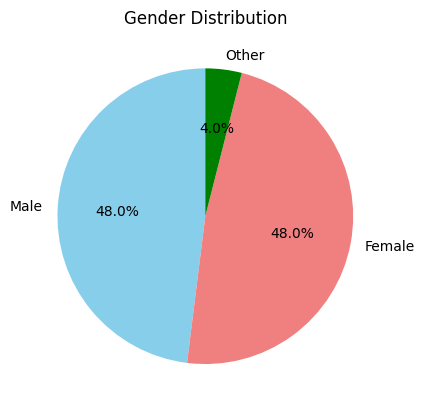

In [ ]:
gender_counts = df['Gender'].value_counts()
# Plot pie chart
gender_counts.plot.pie(
    autopct='%1.1f%%', #shows percentage
    startangle=90,
    colors=['skyblue', 'lightcoral','green'],
    title='Gender Distribution'
)
plt.ylabel('')  # Hide y-label
plt.show()

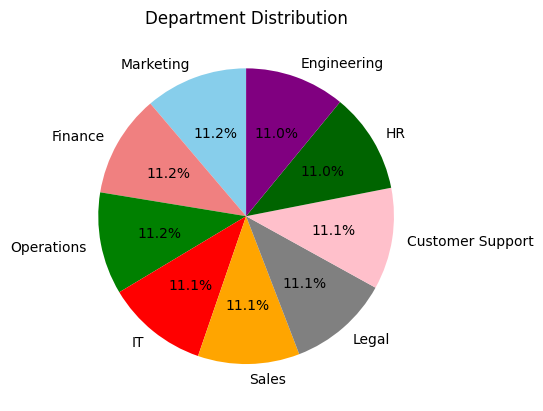

In [ ]:
department_counts = df['Department'].value_counts()
# Plot pie chart
department_counts.plot.pie(
    autopct='%1.1f%%', #shows percentage
    startangle=90,
    colors=['skyblue', 'lightcoral','green','red','orange','grey','pink','darkgreen','purple'],
    title='Department Distribution'
)
plt.ylabel('')  # Hide y-label
plt.show()

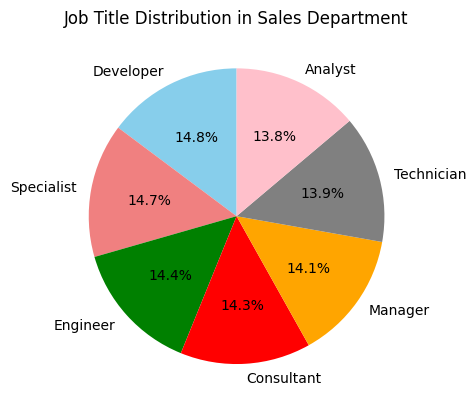

In [ ]:
salesDepartment_counts = df_sales['Job_Title'].value_counts()
# Plot pie chart
salesDepartment_counts.plot.pie(
    autopct='%1.1f%%', #shows percentage
    startangle=90,
    colors=['skyblue', 'lightcoral','green','red','orange','grey','pink','darkgreen','purple'],
    title='Job Title Distribution in Sales Department'
)
plt.ylabel('')  # Hide y-label
plt.show()

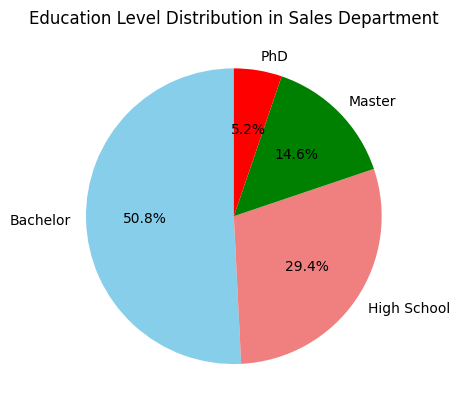

In [ ]:
salesEducationlevel_counts = df_sales['Education_Level'].value_counts()
# Plot pie chart
salesEducationlevel_counts.plot.pie(
    autopct='%1.1f%%', #shows percentage
    startangle=90,
    colors=['skyblue', 'lightcoral','green','red','orange','grey','pink','darkgreen','purple'],
    title='Education Level Distribution in Sales Department'
)
plt.ylabel('')  # Hide y-label
plt.show()

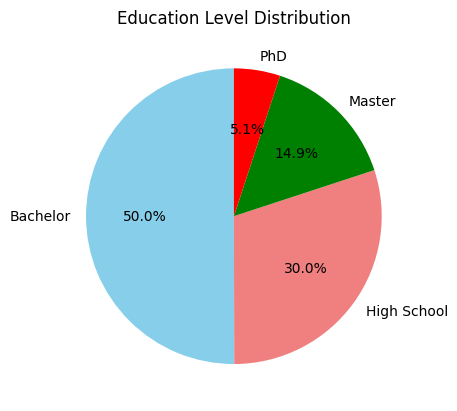

In [ ]:
educationlevel_counts = df['Education_Level'].value_counts()
# Plot pie chart
educationlevel_counts.plot.pie(
    autopct='%1.1f%%', #shows percentage
    startangle=90,
    colors=['skyblue', 'lightcoral','green','red','orange','grey','pink','darkgreen','purple'],
    title='Education Level Distribution'
)
plt.ylabel('')  # Hide y-label
plt.show()

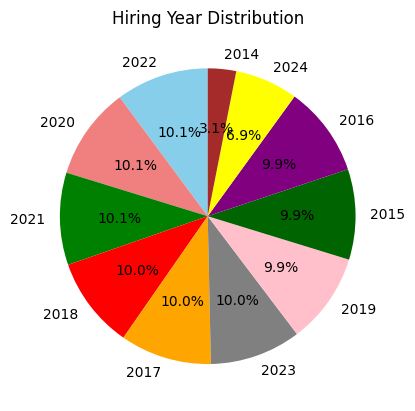

In [ ]:
df['Year'] = df['Hire_Date'].dt.year
hiringyear_counts = df['Year'].value_counts()
# Plot pie chart
hiringyear_counts.plot.pie(
    autopct='%1.1f%%', #shows percentage
    startangle=90,
    colors=['skyblue', 'lightcoral','green','red','orange','grey','pink','darkgreen','purple','yellow','brown','violet'],
    title='Hiring Year Distribution'
)
plt.ylabel('')  # Hide y-label
plt.show()

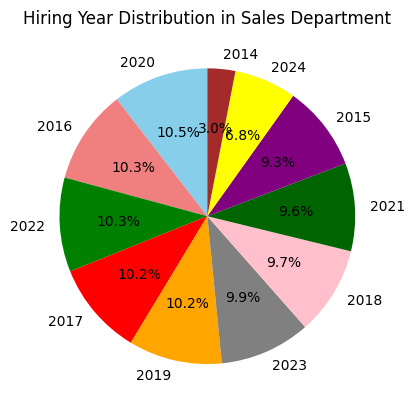

In [ ]:
df_sales['Year'] = df_sales['Hire_Date'].dt.year
hiringyearsales_counts = df_sales['Year'].value_counts()
# Plot pie chart
hiringyearsales_counts.plot.pie(
    autopct='%1.1f%%', #shows percentage
    startangle=90,
    colors=['skyblue', 'lightcoral','green','red','orange','grey','pink','darkgreen','purple','yellow','brown','violet'],
    title='Hiring Year Distribution in Sales Department'
)
plt.ylabel('')  # Hide y-label
plt.show()

Type Casting and Hot Encoding:

In [ ]:
#encoding 'education level' , in numeric terms by using map(), as, it has meaning:
df['Education_Level']=df['Education_Level'].map({'High School':1,'Bachelor':2,'Master':3,'PhD':4})
df_sales['Education_Level']=df_sales['Education_Level'].map({'High School':1,'Bachelor':2,'Master':3,'PhD':4})
df.head(10)
#hot_ncoding for 'gender':
df=pd.get_dummies(df,columns=['Gender'])
df['Gender_Female']=df['Gender_Female'].astype(int)
df['Gender_Male']=df['Gender_Male'].astype(int)
df['Gender_Other']=df['Gender_Other'].astype(int)
df['Resigned']=df['Resigned'].astype(int)
df_sales=pd.get_dummies(df_sales,columns=['Gender'])
df_sales['Gender_Female']=df_sales['Gender_Female'].astype(int)
df_sales['Gender_Male']=df_sales['Gender_Male'].astype(int)
df_sales['Gender_Other']=df_sales['Gender_Other'].astype(int)
df_sales['Resigned']=df_sales['Resigned'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee_ID                  100000 non-null  int64         
 1   Department                   100000 non-null  object        
 2   Age                          100000 non-null  int64         
 3   Job_Title                    100000 non-null  object        
 4   Hire_Date                    100000 non-null  datetime64[ns]
 5   Years_At_Company             100000 non-null  int64         
 6   Education_Level              100000 non-null  int64         
 7   Performance_Score            100000 non-null  int64         
 8   Monthly_Salary               100000 non-null  float64       
 9   Work_Hours_Per_Week          100000 non-null  int64         
 10  Projects_Handled             100000 non-null  int64         
 11  Overtime_Hours             

/tmp/ipython-input-277-1164137812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['Education_Level']=df_sales['Education_Level'].map({'High School':1,'Bachelor':2,'Master':3,'PhD':4})


'\nThe other observation is a 0.102 skewness in monthly salary, \nbut it is close to 0, therefore, is fine for linear regression model.\n'

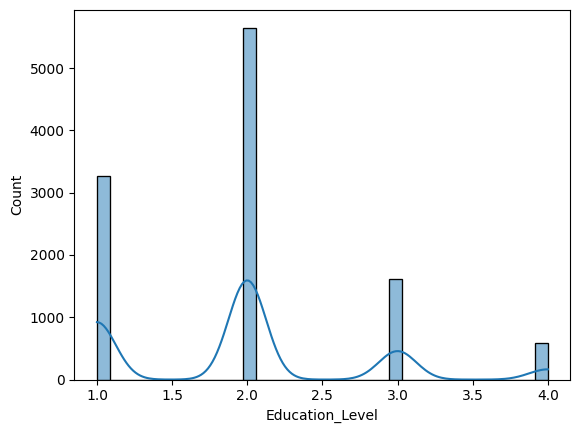

In [ ]:
#checking for skweness:
df_sales["Age"].skew()    #normally distributed
df_sales['Employee_Satisfaction_Score'].skew() #normally distributed
df_sales['Overtime_Hours'].skew()  #normally skewed
df_sales['Work_Hours_Per_Week'].skew() #normally skewed
df_sales["Years_At_Company"].skew() #normally distributed
df_sales["Monthly_Salary"].skew() #0.102 skewness..still very close to 0
df_sales['Overtime_Hours'].skew() #normally distributed
df_sales['Performance_Score'].skew() #normally distributed
df_sales['Sick_Days'].skew()    #normally distributed
df_sales['Projects_Handled'].skew()  #normally distributed
df_sales['Education_Level'].skew() #moderately right skewed
"""
noticed right skewness in education level
Right skewness suggests that there are values that are higher than the others
"""
df_sales['Education_Level'].mean()#1.9566
df_sales['Education_Level'].median()#2.0
sns.histplot(df_sales['Education_Level'], kde=True)
#The graph simply tells us that more people are less educated i.e, have only bachelor's degree
"""
The other observation is a 0.102 skewness in monthly salary,
but it is close to 0, therefore, is fine for linear regression model.
"""

Results of univariate analysis:
The analysis shows that almost everything is normally distributed incluing categorical and numerical data...
But the analysis shows us that the company has the highest number of employees with a Bachelor's degree, and lowest with a PhD. Overall, the company has more pople with less education and less people with advanced education. Whereas, the monthly salary is normally distributed among these individuals.

Studying Correlation:

In [ ]:
corr_sales=df_sales[[ 'Age','Years_At_Company', 'Education_Level',
                     'Performance_Score','Monthly_Salary', 'Work_Hours_Per_Week',
                      'Projects_Handled','Overtime_Hours', 'Sick_Days',
                      'Remote_Work_Frequency', 'Team_Size',
                      'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
                      'Resigned', 'Gender_Female', 'Gender_Male','Gender_Other']] #dropping year too..
#as, gender distribution is about normal, I won't be using groupby()
corr_sales.corr()

Age  Years_At_Company  Education_Level  \
Age                          1.000000          0.001213         0.013713   
Years_At_Company             0.001213          1.000000         0.000870   
Education_Level              0.013713          0.000870         1.000000   
Performance_Score           -0.003468          0.010942         0.010245   
Monthly_Salary              -0.009411          0.006285         0.020701   
Work_Hours_Per_Week         -0.003357         -0.000862         0.010005   
Projects_Handled            -0.011380          0.008145        -0.000878   
Overtime_Hours              -0.011822          0.008100         0.013822   
Sick_Days                    0.006231         -0.006147        -0.000571   
Remote_Work_Frequency       -0.018094         -0.005337        -0.011031   
Team_Size                    0.002807         -0.020392        -0.011981   
Training_Hours              -0.017461          0.002987        -0.003867   
Promotions                   0.001174         -0.020737         0.000960   
Employee_Satisfaction_Score  0.005404         -0.003140        -0.008309   
Resigned                    -0.003896          0.002603        -0.000805   
Gender_Female               -0.000475          0.012679         0.017028   
Gender_Male                  0.004439         -0.003458        -0.012355   
Gender_Other                -0.010154         -0.023644        -0.011999   

                             Performance_Score  Monthly_Salary  \
Age                                  -0.003468       -0.009411   
Years_At_Company                      0.010942        0.006285   
Education_Level                       0.010245        0.020701   
Performance_Score                     1.000000        0.510131   
Monthly_Salary                        0.510131        1.000000   
Work_Hours_Per_Week                  -0.008038       -0.001006   
Projects_Handled                      0.000108       -0.007309   
Overtime_Hours                        0.003212       -0.010735   
Sick_Days                             0.006986       -0.005920   
Remote_Work_Frequency                 0.022021        0.018090   
Team_Size                            -0.006649        0.004439   
Training_Hours                        0.001014        0.003513   
Promotions                           -0.015001       -0.008682   
Employee_Satisfaction_Score           0.000283        0.001285   
Resigned                              0.004319        0.013917   
Gender_Female                        -0.002619       -0.000747   
Gender_Male                           0.002685        0.001016   
Gender_Other                         -0.000166       -0.000689   

                             Work_Hours_Per_Week  Projects_Handled  \
Age                                    -0.003357         -0.011380   
Years_At_Company                       -0.000862          0.008145   
Education_Level                         0.010005         -0.000878   
Performance_Score                      -0.008038          0.000108   
Monthly_Salary                         -0.001006         -0.007309   
Work_Hours_Per_Week                     1.000000         -0.000420   
Projects_Handled                       -0.000420          1.000000   
Overtime_Hours                          0.012224          0.002385   
Sick_Days                               0.004271         -0.005780   
Remote_Work_Frequency                  -0.007061          0.001184   
Team_Size                               0.001185          0.004494   
Training_Hours                         -0.006037          0.002704   
Promotions                             -0.002774         -0.009692   
Employee_Satisfaction_Score            -0.002063         -0.001118   
Resigned                               -0.003562         -0.010300   
Gender_Female                           0.006808          0.015526   
Gender_Male                            -0.005714         -0.011486   
Gender_Other                           -0.002811         -0.010372   

   

<Axes: >

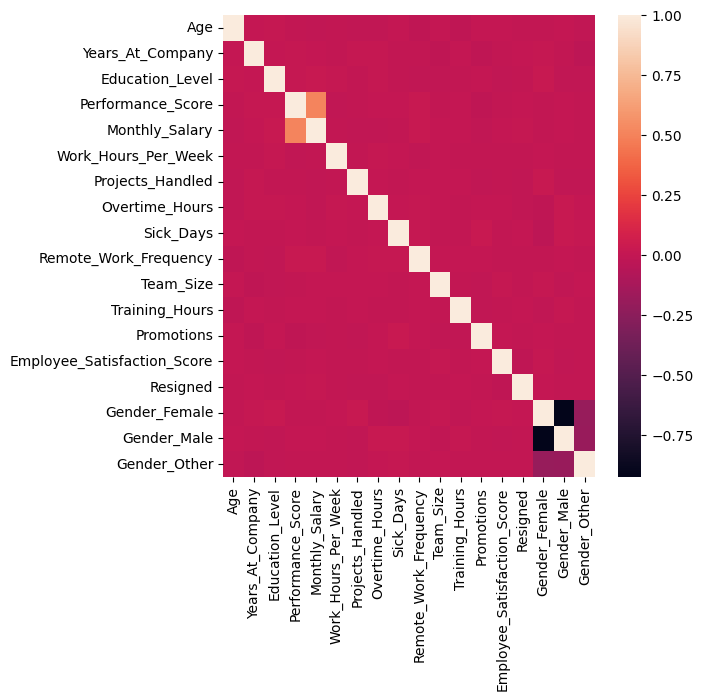

In [ ]:
#making a heatmap:
plt.figure(figsize=(6,6))
sns.heatmap(corr_sales.corr())

Correlation summary:
The correlation cross-chart shows a positive 0.5 correlation between performance score and monthly salary.
Ignoring the negative correlation between gender and gender as, i used hot-encoding, and used the all 3 columns, where male and females were equally distributed whereas, 4% others were found..i'll furthur look into that.
The interesting fact is that, educational level made no impact on monthly salary and performance(only 0.020 correlation found between education level and monthly salary.)..will look into that too
overtime and sickdays have 0.024 correlation, maybe suggesting that the more the overtime, the more sick days employees need.
performance and remote work frequency also shows a 0.022 correlation..suggesting the more the employees work from a comfortable environment, the better performance we see..

Bivariate Analysis:

<Axes: xlabel='Education_Level'>

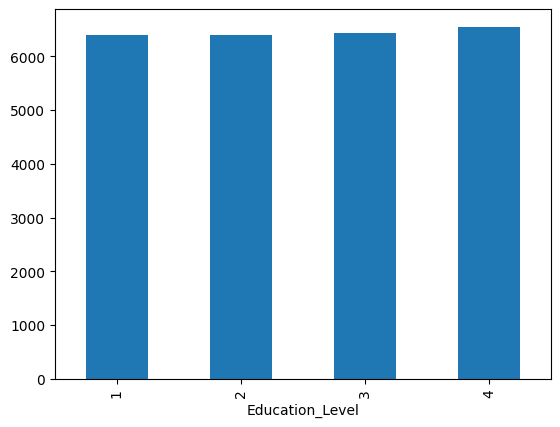

In [ ]:
df_sales.groupby('Education_Level')['Monthly_Salary'].mean().plot(kind='bar')
#very less difference...almost negligible.

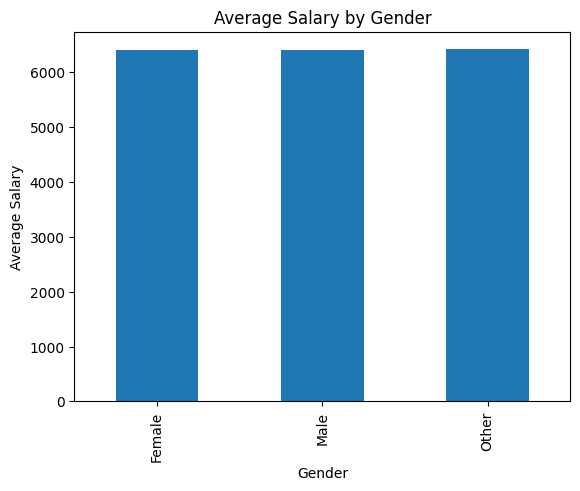

In [ ]:
def decode_gender(row):
    if row['Gender_Male'] == 1:
        return 'Male'
    elif row['Gender_Female'] == 1:
        return 'Female'
    elif row['Gender_Other'] == 1:
        return 'Other'
    else:
        return 'Unknown'
df['Gender'] = df.apply(decode_gender, axis=1)
avg_salary_by_gender = df.groupby('Gender')['Monthly_Salary'].mean()
avg_salary_by_gender.plot(kind='bar', title='Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show() #no noticeable difference found

In [ ]:
df_sales.columns

Index(['Employee_ID', 'Department', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned', 'Year', 'Gender_Female', 'Gender_Male', 'Gender_Other'],
      dtype='object')

<Axes: xlabel='Sick Days', ylabel='Overtime Hours'>

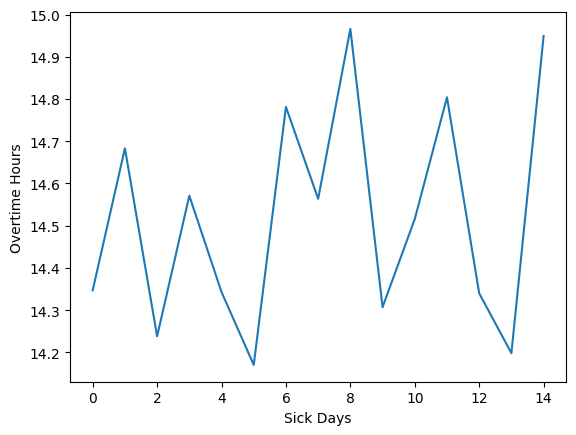

In [ ]:
df_sales.groupby('Sick_Days')['Overtime_Hours'].mean().plot(kind='line',xlabel='Sick Days',ylabel='Overtime Hours')
#lesser the sick days, lesser the overtime hours

<Axes: xlabel='Remote Work', ylabel='Performance score'>

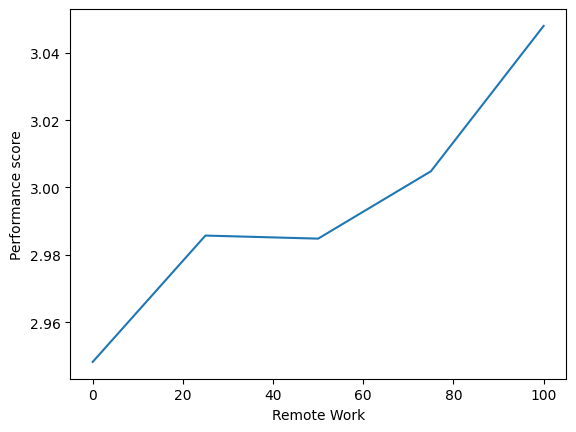

In [ ]:
df_sales.groupby('Remote_Work_Frequency')['Performance_Score'].mean().plot(kind='line',xlabel='Remote Work',ylabel='Performance score')
#can observe a consistent increase in performnce with remote work frequency

#3. Model Building:

Linear Regression Model Building:
This will be done by taking 'Performance score' as the dependent variable, as, we are going to predict this variable. The predictor in this variable will be 'Monthly salary'. As, seen from the analysis above that the monthly salary has a positive correlation with the performance. I will be using the data from sales deparment only, as, required in the assignment.

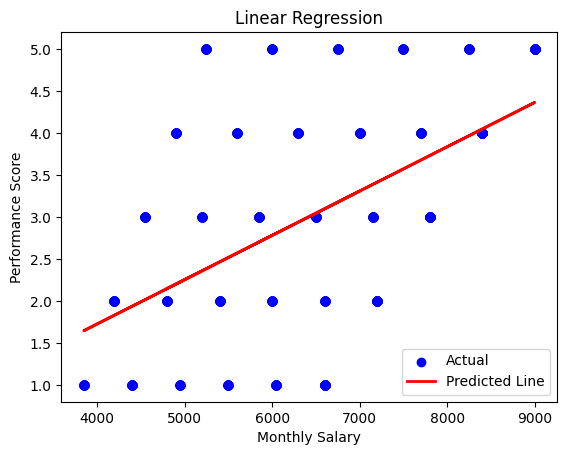

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df_sales[['Monthly_Salary']]#independent variable
Y=df_sales[['Performance_Score']]#dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
mode=LinearRegression()
mode.fit(X_train,Y_train)
Y_pred=mode.predict(X_test)
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Monthly Salary")
plt.ylabel("Performance Score")
plt.title("Linear Regression")
plt.legend()
plt.show()

The inclined line shows a positive increase in performance scores with increase in salary.

#4. Model Evaluation:

In [ ]:
#calculating MSE:
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("mse=",mse)
import math
print("rmse=",math.sqrt(mse))
r2_score(Y_test,Y_pred)

mse= 1.414606214871462
rmse= 1.1893721935842716


0.2722764610877145

The r2 score explains that the model can only explain 27.22% variance in the target variable. High MSE(mean squared error) means the prediction will be incorrect. To lower MSE, I'm going to normalize the monthly salary.

In [ ]:
#normalizing the monthly salary:
#as, the data is normally distributed, i'll use standard scalar:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_sales['Monthly_SalaryStandardized']=scaler.fit_transform(df_sales[['Monthly_Salary']])
df_sales.head()

Employee_ID Department  Age   Job_Title                  Hire_Date  \
17           18      Sales   28   Developer 2022-11-08 08:03:05.556036   
21           22      Sales   59     Manager 2017-05-25 08:03:05.556036   
23           24      Sales   58  Consultant 2018-01-21 08:03:05.556036   
33           34      Sales   25    Engineer 2021-09-11 08:03:05.556036   
36           37      Sales   43  Consultant 2024-04-04 08:03:05.556036   

    Years_At_Company  Education_Level  Performance_Score  Monthly_Salary  \
17                 1                1                  3          6500.0   
21                 7                3                  5          9000.0   
23                 6                3                  2          6600.0   
33                 2                4                  4          8400.0   
36                 0                1                  2          6600.0   

    Work_Hours_Per_Week  ...  Team_Size  Training_Hours  Promotions  \
17                   47  ...         12              54           0   
21                   30  ...          4              20           0   
23                   55  ...          6              78           2   
33                   44  ...         18              37           2   
36                   53  ...         16              18           1   

    Employee_Satisfaction_Score  Resigned  Year  Gender_Female  Gender_Male  \
17                            1         0  2022              0            0   
21                            5         0  2017              0            1   
23                            4         0  2018              0            1   
33                            2         0  2021              1            0   
36                            5         0  2024              0            1   

    Gender_Other  Monthly_SalaryStandardized  
17             1                    0.063620  
21             0                    1.895031  
23             0                    0.136877  
33             0                    1.455493  
36             0                    0.136877  

[5 rows x 24 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df_sales[['Monthly_SalaryStandardized']]#independent variable
Y=df_sales[['Performance_Score']]#dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
mode=LinearRegression()
mode.fit(X_train,Y_train)
Y_pred=mode.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
r2_score(Y_test,Y_pred)
print(mse)
import math
print(math.sqrt(mse))

1.414606214871462
1.1893721935842716


In [ ]:
df_sales.columns

Index(['Employee_ID', 'Department', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned', 'Year', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Monthly_SalaryStandardized'],
      dtype='object')

It changed nothing..moving to the next approach, adding more variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df_sales[['Monthly_Salary','Overtime_Hours','Sick_Days','Years_At_Company','Work_Hours_Per_Week','Team_Size','Promotions','Age']]#independent variable
Y=df_sales[['Performance_Score']]#dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
mode=LinearRegression()
mode.fit(X_train,Y_train)
Y_pred=mode.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
r2_score(Y_test,Y_pred)
print(mse)
import math
print(math.sqrt(mse))

1.4127550919367529
1.1885937455399775


Adding more variables decreased MSE..but adding education levels,training hours increased it. This indiactes that education level is not a valid indicator of performance nor does training hours guarantee good performance.
-Chcking if the bigger dataset will provide a lower mse:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df[['Monthly_Salary']]#independent variable
Y=df[['Performance_Score']]#dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
mode=LinearRegression()
mode.fit(X_train,Y_train)
Y_pred=mode.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
r2_score(Y_test,Y_pred)
print(mse)
import math
print(math.sqrt(mse))

1.4705766967616318
1.2126733677135124


increased mse even more..
Don't know how to plot a multiple regression model so, moving to conclusions..

In [ ]:
#Predicting performance scores based on salaries:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df_sales[['Monthly_Salary']]#independent variable
Y=df_sales['Performance_Score']#dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
mode=LinearRegression()
mode.fit(X_train,Y_train)
Y_pred=mode.predict(X_test)
new_data = pd.DataFrame({
    'Monthly_Salary': [7345,6783,8056,9010]
    })
predictions = mode.predict(new_data)
print((predictions).round(3).astype(int))#it does make very close predictions

[3 3 3 4]


#5. Conclusion:

Summary:
The complete analysis showed a very weak correlation between the given variables..yet a 0.5 correlation was found between monthly salary of the employees and their performance scores..the data also showed the dependence of performance on other variables in the data such as overtime hours, sick days,years at the company or experience at the company, work hours per week, team size, promotions and age. An interesting correlation between remote work hours and performance scores was also observed.. These overall observtions suggest that:
1. The company has more people with low education and less people with higher education.
2. The gender has no affect on performance
3. People with higher salaries are more inclined to resigning.
4. The education level and experience has no impact on the salary or just a minor impact.
5. The greater the age, the lower the salary..yet the correlation is negligile.
6. The more an employee works overtime, the more sick days he need.
7. The model does predict the performance scores on the basis of salary, yet, it is not efficient in doing so. it can mispredict by a whole core point.